### DOLE Deployment of OFWs by Country of Destination from 2007-2012

The dataset used can be found here: https://data.gov.ph/?q=dataset/deployed-overseas-filipino-workers-ofws-country-destination

Overseas Filipino Workers (OFWs) are an important part of Filipino society. Not only do they work hard to provide for their families, they also help the country's economy. Personal remittances accounted for 9% of our GDP in 2012<sup>[1]</sup>.
Additionally, according to the Philippine Statistics Authority, there were around 2.2 million OFWs in 2012<sup>[2]</sup>. Analyzing this dataset from the Department of Labor and Employment may provide us with an idea as to where OFWs were deployed to work from 2007-2012.

The goal of this analysis is to answer the following questions:
- Which destinations had the highest share of Filipino OFW deployment from 2007-2012?
- How did these destinations grow in OFW deployment over the 6 year period?

[1]:https://data.worldbank.org/indicator/BX.TRF.PWKR.DT.GD.ZS?locations=PH&most_recent_value_desc=true
[2]:https://psa.gov.ph/content/2012-survey-overseas-filipinos#:~:text=Overseas%20Filipino%20Workers%20is%20estimated,was%20estimated%20at%202.220%20million.

In [52]:
#To facilicate our anylasis, we will be making use of the following libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#The dataset will be assigned to the variable 'ofw' and dash(-) values will be converted to NaN (not a number)
ofw = pd.read_csv('ofw.csv',na_values='-')

### Exploring and cleaning the dataset

In [2]:
#Dataset information
ofw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country_of_destination_1  54 non-null     object 
 1   country_of_destination_2  54 non-null     object 
 2   country_of_destination_3  54 non-null     object 
 3   2007                      50 non-null     float64
 4   2008                      50 non-null     float64
 5   2009                      53 non-null     float64
 6   2010                      48 non-null     float64
 7   2011                      48 non-null     float64
 8   2012                      48 non-null     float64
dtypes: float64(6), object(3)
memory usage: 3.9+ KB


In [3]:
#The dataset at a glance
ofw.head()

,country_of_destination_1,country_of_destination_2,country_of_destination_3,2007,2008,2009,2010,2011,2012
0,Land-Based,Land-Based,Land-Based,811070.0,974399.0,1092162.0,1123676.0,1318727.0,1435166.0
1,Land-Based,Africa,Africa,13126.0,16434.0,18967.0,25207.0,28531.0,25194.0
2,Land-Based,Africa,Angola,2935.0,4289.0,5222.0,6255.0,5313.0,4294.0
3,Land-Based,Africa,Equatorial Guinea,1780.0,1654.0,1692.0,1876.0,2020.0,1931.0
4,Land-Based,Africa,Nigeria,1601.0,12.0,252.0,1426.0,1691.0,1997.0


In [4]:
#Renaming columns for clarity
ofw.columns = ['land_or_sea','continent','country','2007','2008','2009','2010','2011','2012']
ofw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   land_or_sea  54 non-null     object 
 1   continent    54 non-null     object 
 2   country      54 non-null     object 
 3   2007         50 non-null     float64
 4   2008         50 non-null     float64
 5   2009         53 non-null     float64
 6   2010         48 non-null     float64
 7   2011         48 non-null     float64
 8   2012         48 non-null     float64
dtypes: float64(6), object(3)
memory usage: 3.9+ KB


In [5]:
#Aggregated rows
ofw[ofw.iloc[:,1]==ofw.iloc[:,2]]

,land_or_sea,continent,country,2007,2008,2009,2010,2011,2012
0,Land-Based,Land-Based,Land-Based,811070.0,974399.0,1092162.0,1123676.0,1318727.0,1435166.0
1,Land-Based,Africa,Africa,13126.0,16434.0,18967.0,25207.0,28531.0,25194.0
7,Land-Based,America,America,28019.0,31916.0,31146.0,25696.0,27679.0,29553.0
13,Land-Based,Asia,Asia,218983.0,219598.0,260995.0,280808.0,415224.0,476021.0
22,Land-Based,Europe,Europe,45613.0,51795.0,47409.0,48185.0,57880.0,47070.0
28,Land-Based,Middle East,Middle East,487878.0,631828.0,669042.0,684060.0,764586.0,825402.0
38,Land-Based,Oceania,Oceania,10691.0,15030.0,13297.0,12341.0,19492.0,27391.0
42,Land-Based,Trust Territories,Trust Territories,6674.0,5461.0,5134.0,3107.0,4236.0,3682.0
47,Not Reported,Not Reported,Not Reported,7.0,2265.0,4992.0,44272.0,1099.0,853.0
48,Others,Others,Others,79.0,72.0,41180.0,NaN,NaN,NaN


Since our goal is concerned with identifying specific destinations through summary calculations, we will remove the already aggregated 'Land-Based' rows. 

The 'Not Reported' and 'Others' rows will also be removed since both are not relevant to our goal and the latter contains null values.

We will be keeping the 'Sea-Based' row since a signficant number of Filipino OFWs pursue Marine Careers. The destination shall still be referred to as 'Sea-Based.'

In [6]:
#Rows with null values
ofw[ofw.isnull().any(axis=1)]

,land_or_sea,continent,country,2007,2008,2009,2010,2011,2012
43,Land-Based,Trust Territories,Commonwealth of Northern,NaN,NaN,NaN,NaN,NaN,NaN
48,Others,Others,Others,79.0,72.0,41180.0,NaN,NaN,NaN
49,Others,Others,Workers With Special Exit Clearance,79.0,72.0,253.0,NaN,NaN,NaN
50,Others,Others,Labor Assistance Center (LAC) Laoag,NaN,NaN,7.0,NaN,NaN,NaN
51,Others,Others,Labor Assistance Center (LAC) Pampanga,NaN,NaN,40466.0,NaN,NaN,NaN
52,Others,Others,Employment-based Immigration,NaN,NaN,454.0,NaN,NaN,NaN


To keep the calculation consistent, we will be removing these rows with null values. The 'Others' rows will be unused since they do not indicate specific destinations. The 'Trust Territories' row will be removed since the numerical values are all null.

In [7]:
#'Rest of Country' rows
ofw[ofw['country'].str.contains('Rest')]

,land_or_sea,continent,country,2007,2008,2009,2010,2011,2012
6,Land-Based,Africa,Rest of Africa,5749.0,9125.0,10261.0,14209.0,17566.0,15657.0
12,Land-Based,America,Rest of America,4288.0,4760.0,5596.0,6309.0,5695.0,5317.0
21,Land-Based,Asia,Rest of Asia,25723.0,29143.0,36743.0,37007.0,44709.0,57919.0
27,Land-Based,Europe,Rest of Europe,10681.0,12563.0,9992.0,10989.0,13884.0,12649.0
37,Land-Based,Middle East,Rest of Middle East,11675.0,7796.0,8406.0,9654.0,9635.0,9881.0
41,Land-Based,Oceania,Rest of Oceania,3236.0,4126.0,2897.0,2292.0,3850.0,4133.0
46,Land-Based,Trust Territories,Rest of Trust Territories,1038.0,989.0,970.0,1188.0,1508.0,1523.0


The 'Rest of' rows are aggrerated values for unmentioned destinations under a specific continent. The dataset does not indicate what these countries are. We will keep them since they complete the total values for continent categories.

The data cleaning will proceed in the next cell.

In [9]:
#Remove all aggregated rows
ofw_clean = ofw[ofw.iloc[:,1]!=ofw.iloc[:,2]]

#Separate 'Sea-based' row and append to the cleaned dataset
ofw_sea = ofw[ofw.iloc[:,0]=='Sea-Based']
ofw_clean = ofw_clean.append(ofw_sea)

#Remove rows with null values
ofw_clean = ofw_clean.dropna()

#Reset indexes
ofw_clean = ofw_clean.reset_index(drop=True)

We will assign the cleaned 'ofw' dataset to 'ofw_clean'. The data is now ready for analysis.

In [10]:
ofw_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   land_or_sea  39 non-null     object 
 1   continent    39 non-null     object 
 2   country      39 non-null     object 
 3   2007         39 non-null     float64
 4   2008         39 non-null     float64
 5   2009         39 non-null     float64
 6   2010         39 non-null     float64
 7   2011         39 non-null     float64
 8   2012         39 non-null     float64
dtypes: float64(6), object(3)
memory usage: 2.9+ KB


### Analyzing OFW deployment by continent 

In [28]:
#Aggregating destinations by continent
ofw_continents = ofw_clean.groupby('continent').sum()

#Create a total column and sort the dataframe by total deployed OFWs
ofw_continents['total'] = ofw_continents.sum(axis=1)
ofw_continents = ofw_continents.sort_values(by=['total'])

#Calcuate the compound average growth rate of OFW deployment for each continent
def CAGR(first, last, periods):
    return (last/first)**(1/periods)-1

ofw_continents['avg_growth_rate'] = CAGR(ofw_continents.iloc[:,0],ofw_continents.iloc[:,5],6)
ofw_continents['avg_growth_rate'] = ofw_continents['avg_growth_rate'].astype(float).map("{:.2%}".format)

ofw_continents

,2007,2008,2009,2010,2011,2012,total,avg_growth_rate
continent,,,,,,,,
Trust Territories,6674.0,5461.0,5134.0,3107.0,4236.0,3682.0,28294.0,-9.44%
Oceania,10691.0,15030.0,13297.0,12341.0,19492.0,24391.0,95242.0,14.74%
Africa,13126.0,16434.0,18967.0,25207.0,28531.0,25194.0,127459.0,11.48%
America,28019.0,31916.0,31146.0,25696.0,27679.0,29553.0,174009.0,0.89%
Europe,45613.0,51795.0,47409.0,48185.0,57880.0,47070.0,297952.0,0.53%
Asia,218983.0,219598.0,260995.0,280808.0,415224.0,476021.0,1871629.0,13.82%
Sea-Based,266553.0,261614.0,330424.0,347150.0,369104.0,366865.0,1941710.0,5.47%
Middle East,487878.0,631828.0,669042.0,684060.0,764586.0,825402.0,4062796.0,9.16%


The data shows that the Middle East is the top destination of OFW deployments from 2007-2012. The other two that follow are Sea-Based deployments and Asia deployments.

Text(0, 0.5, '')

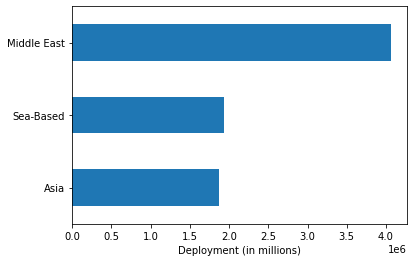

In [59]:
#Bar chart comparison of total deployments
ofw_continents.iloc[-3:,-2].T.plot(kind='barh')
plt.xlabel('Deployment (in millions)')
plt.ylabel('')

Based on the bar chart, there were over 4 million OFWs deployed in the Middle East over a 6 year period. That is almost twice the number of Sea-Based and Asian OFW deployments.

<AxesSubplot:>

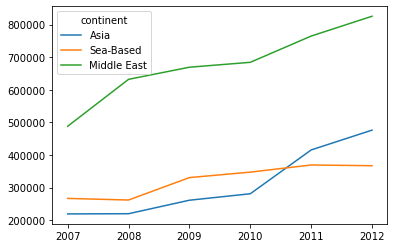

In [60]:
#Line graph of top 3 destinations
ofw_continents.iloc[-3:,:-2].T.plot()

Above is the growth of OFW deployment over time for the Top 3 destinations. They will be split into individual graphs below.

Text(2.3, 80000, 'Asia')

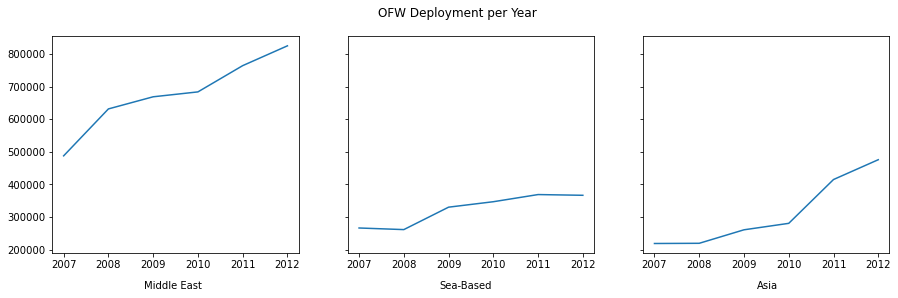

In [61]:
#Assign individual series per destination
ofwc_me = ofw_continents.iloc[-1,:-2]
ofwc_sb = ofw_continents.iloc[-2,:-2]
ofwc_as = ofw_continents.iloc[-3,:-2]

#Create and plot subplots for each destination
fig, (ax1, ax2, ax3) = plt.subplots(1,3,sharey=True,sharex=True,figsize=(15,4))
fig.suptitle('OFW Deployment per Year')

axes = [ax1,ax2,ax3]

ax1.plot(ofwc_me)
ax1.text(1.8,80000,'Middle East')
ax2.plot(ofwc_sb)
ax2.text(1.8,80000,'Sea-Based')
ax3.plot(ofwc_as)
ax3.text(2.3,80000,'Asia')

In [62]:
ofw_continents.iloc[-3:]

,2007,2008,2009,2010,2011,2012,total,avg_growth_rate
continent,,,,,,,,
Asia,218983.0,219598.0,260995.0,280808.0,415224.0,476021.0,1871629.0,13.82%
Sea-Based,266553.0,261614.0,330424.0,347150.0,369104.0,366865.0,1941710.0,5.47%
Middle East,487878.0,631828.0,669042.0,684060.0,764586.0,825402.0,4062796.0,9.16%


While the Middle East had the largest amount of deployments, Asia had a higher growth in deployments, which increased 13.82% per year on average.

### Analyzing OFW Deployment by country in the Middle East and Asia

Our findings show that the Middle East and Asia were the land-based destinations with the most number of OFW deployments. We will deepen our analysis by looking at them on a country level.

#### OFW Deployment in the Middle East

In [16]:
#Filtering the dataset to Middle Eastern countries
ofw_mideast = ofw_clean[ofw_clean.iloc[:,1]=='Middle East']

#Dropping 'land_or_sea' and 'continent' columns, setting 'country' as the index
ofw_mideast = ofw_mideast.drop(ofw_mideast.columns[[0,1]],axis=1).set_index('country')

#Creating a total deployment column
ofw_mideast['total'] = ofw_mideast.sum(axis=1)
ofw_mideast = ofw_mideast.sort_values(by=['total'])

#Calculating and formatting the average growth rate
ofw_mideast['avg_growth_rate'] = CAGR(ofw_mideast.iloc[:,0],ofw_mideast.iloc[:,5],6)
ofw_mideast['avg_growth_rate'] = ofw_mideast['avg_growth_rate'].astype(float).map("{:.2%}".format)

ofw_mideast

,2007,2008,2009,2010,2011,2012,total,avg_growth_rate
country,,,,,,,,
Lebanon,468.0,12.0,1326.0,1327.0,896.0,1227.0,5256.0,17.43%
Libya,5941.0,7731.0,10383.0,11604.0,2152.0,6481.0,44292.0,1.46%
Rest of Middle East,11675.0,7796.0,8406.0,9654.0,9635.0,9881.0,57047.0,-2.74%
Oman,7463.0,10222.0,10502.0,10955.0,15029.0,16048.0,70219.0,13.61%
Bahrain,9898.0,13079.0,15001.0,15434.0,18230.0,22271.0,93913.0,14.47%
Kuwait,37080.0,38903.0,45900.0,53010.0,65603.0,75286.0,315782.0,12.53%
Qatar,56277.0,84342.0,89290.0,87813.0,100530.0,104622.0,522874.0,10.89%
United Arab Emirates,120657.0,193810.0,196815.0,201214.0,235775.0,259546.0,1207817.0,13.62%
Saudi Arabia,238419.0,275933.0,291419.0,293049.0,316736.0,330040.0,1745596.0,5.57%


The data shows that Saudi Arabia, the United Arab Erimates (UAE), and Qatar are the top 3 destinations in the Middle East for OFW deployments.

Text(0, 0.5, '')

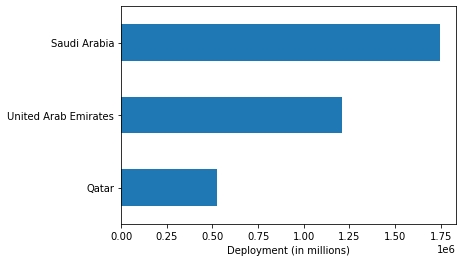

In [67]:
ofw_mideast.iloc[-3:,-2].T.plot(kind='barh')
plt.xlabel('Deployment (in millions)')
plt.ylabel('')

Based on the bar chart, only Saudi Arabia and the UAE exceedeed 1 million deployments over the 6 year period. Trailing them is Qatar, with deployments totalling slightly above 500,000.

<AxesSubplot:>

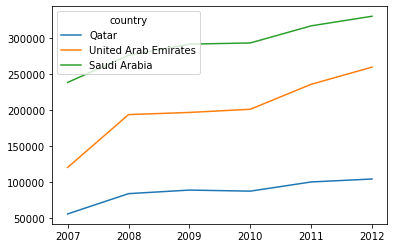

In [18]:
ofw_mideast.iloc[-3:,:-2].T.plot()

Above is the growth of OFW deployment over time for the Top 3 Middle East destinations. They will be split into individual graphs below.

Text(2.2, 1000, 'Qatar')

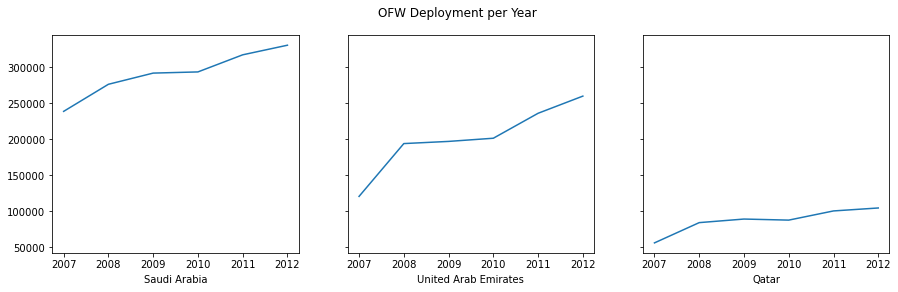

In [19]:
me_sau = ofw_mideast.iloc[-1,:-2]
me_uae = ofw_mideast.iloc[-2,:-2]
me_qtr = ofw_mideast.iloc[-3,:-2]

fig, (ax1, ax2, ax3) = plt.subplots(1,3,sharey=True,sharex=True,figsize=(15,4))
fig.suptitle('OFW Deployment per Year')

axes = [ax1,ax2,ax3]

ax1.plot(me_sau)
ax1.text(1.8,1000,'Saudi Arabia')
ax2.plot(me_uae)
ax2.text(1.3,1000,'United Arab Emirates')
ax3.plot(me_qtr)
ax3.text(2.2,1000,'Qatar')

In [20]:
ofw_mideast.iloc[-3:]

,2007,2008,2009,2010,2011,2012,total,avg_growth_rate
country,,,,,,,,
Qatar,56277.0,84342.0,89290.0,87813.0,100530.0,104622.0,522874.0,10.89%
United Arab Emirates,120657.0,193810.0,196815.0,201214.0,235775.0,259546.0,1207817.0,13.62%
Saudi Arabia,238419.0,275933.0,291419.0,293049.0,316736.0,330040.0,1745596.0,5.57%


While Saudi Arabia had the highest total deployments, its average growth rate was only around 5%. The UAE and Qatar, having double-digit averages, grew faster than Saudi Arabia at 10% and 13% respectively.

#### OFW Deployment in Asia

In [64]:
#Filtering the dataset to Asian countries
ofw_asia = ofw_clean[ofw_clean.iloc[:,1]=='Asia']

#Dropping 'land_or_sea' and 'continent' columns, setting 'country' as the index
ofw_asia = ofw_asia.drop(ofw_asia.columns[[0,1]],axis=1).set_index('country')

#Creating a total deployment column
ofw_asia['total'] = ofw_asia.sum(axis=1)
ofw_asia = ofw_asia.sort_values(by=['total'])

#Calculating and formatting the average growth rate
ofw_asia['avg_growth_rate'] = CAGR(ofw_asia.iloc[:,0],ofw_asia.iloc[:,5],6)
ofw_asia['avg_growth_rate'] = ofw_asia['avg_growth_rate'].astype(float).map("{:.2%}".format)

ofw_asia

,2007,2008,2009,2010,2011,2012,total,avg_growth_rate
country,,,,,,,,
Japan,8867.0,6555.0,6418.0,5938.0,9285.0,9947.0,47010.0,1.93%
Brunei,14667.0,6930.0,7413.0,7907.0,15406.0,14907.0,67230.0,0.27%
Korea,14265.0,12367.0,14851.0,11697.0,10943.0,8979.0,73102.0,-7.43%
Malaysia,9725.0,6034.0,7256.0,9802.0,16797.0,38407.0,88021.0,25.72%
Taiwan,37136.0,38546.0,33751.0,36866.0,41896.0,41492.0,229687.0,1.87%
Rest of Asia,25723.0,29143.0,36743.0,37007.0,44709.0,57919.0,231244.0,14.49%
Singapore,49431.0,41678.0,54421.0,70251.0,146613.0,172690.0,535084.0,23.18%
Hong Kong,59169.0,78345.0,100142.0,101340.0,129575.0,131680.0,600251.0,14.26%


The top 3 countries for OFW Deployments are Hong Kong, Singapore, and Taiwain. We will not consider the 'Rest of Asia' in our ranking as this is an aggregated row of multiple countries.

<AxesSubplot:ylabel='country'>

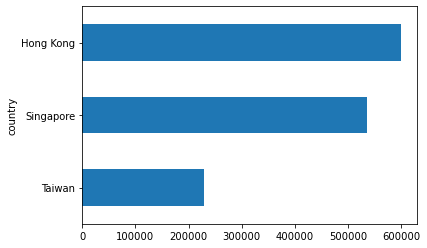

In [70]:
ofw_asia.iloc[[-4,-2,-1],-2].T.plot(kind='barh')

The bar chart shows that only Hong Kong and Singapore exceeded 500,000 OFW deployments over the 6 year period. Taiwain's total trails them at a count slightly below 230,000. 

<AxesSubplot:>

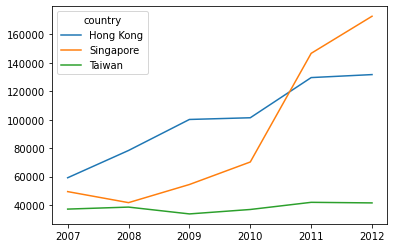

In [24]:
ofw_asia.iloc[[-1,-2,-4],:-2].T.plot()

Above is the growth of OFW deployment over time for the Top 3 Asian destinations. They will be split into individual graphs below.

Text(2.15, 1000, 'Taiwan')

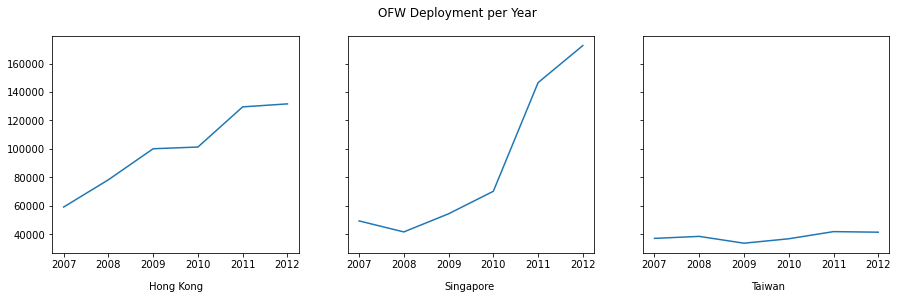

In [66]:
as_hk = ofw_asia.iloc[-1,:-2]
as_sg = ofw_asia.iloc[-2,:-2]
as_tw = ofw_asia.iloc[-4,:-2]

fig, (ax1, ax2, ax3) = plt.subplots(1,3,sharey=True,sharex=True,figsize=(15,4))
fig.suptitle('OFW Deployment per Year')

axes = [ax1,ax2,ax3]

ax1.plot(as_hk)
ax1.text(1.9,1000,'Hong Kong')
ax2.plot(as_sg)
ax2.text(1.9,1000,'Singapore')
ax3.plot(as_tw)
ax3.text(2.15,1000,'Taiwan')

In [27]:
ofw_asia.iloc[[-1,-2,-4]]

,2007,2008,2009,2010,2011,2012,total,avg_growth_rate
country,,,,,,,,
Hong Kong,59169.0,78345.0,100142.0,101340.0,129575.0,131680.0,600251.0,14.26%
Singapore,49431.0,41678.0,54421.0,70251.0,146613.0,172690.0,535084.0,23.18%
Taiwan,37136.0,38546.0,33751.0,36866.0,41896.0,41492.0,229687.0,1.87%


Singapore, while only around 10.8% smaller in total deployments than Hong Kong, has averaged a high growth rate of 23%. Although, Hong Kong still averaged a double-digit growth rate of 14%. Taiwain averaged a relatively slower growth rate of 1.8% yet it was still one of the 3 Asian countries that exceeded 200,000 total deployments.

### Conclusions

This is a summary of our findings:

- The Middle East, Sea-based deployments, and Asia accounted for the highest number of OFW deployments from 2007-2012.

- The Middle East held the highest total deployments but Asia had a higher average growth rate.

- In the Middle East, Saudi Arabia was the most populous destination but the UAE is currently outpacing its growth and the total deploymeny difference is not that far off.

- In Asia, Hong Kong had the most total deployments and averaged a high growth rate. Although, Singapore's total deployments were not that far off and the country averaged a higher growth rate than Hong Kong.

If more data were available in a future iteration of this dataset, I would like to explore the following:
- What are the industries or occupations of OFWs in the Middle East and Asia?
- What